# Leaf Classification

In [1]:
#importing the dataset 

import pandas as pd
# pd.set_option('display.max_rows',2000)
df = pd.read_csv("leaf_dataset.csv")

## 1. Data Preparation

### 1.1 Describing the Data

The dataset consists of the following 4 features:
1. id - an anonymous id unique to an image
2. margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
3. shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
4. texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

Below are some statistics from the data

In [2]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


### 1.2 Cleaning the Data

#### 1.2.1 Checking for Missing Values

In [3]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


No missing values were detected. Therefore no need for data filling techniques.

#### 1.2.2 Checking for Duplicates

In [4]:
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 0


No duplicates were detected.

### 1.4 Visualizing Data

#### 1.4.1 Distribution of Species

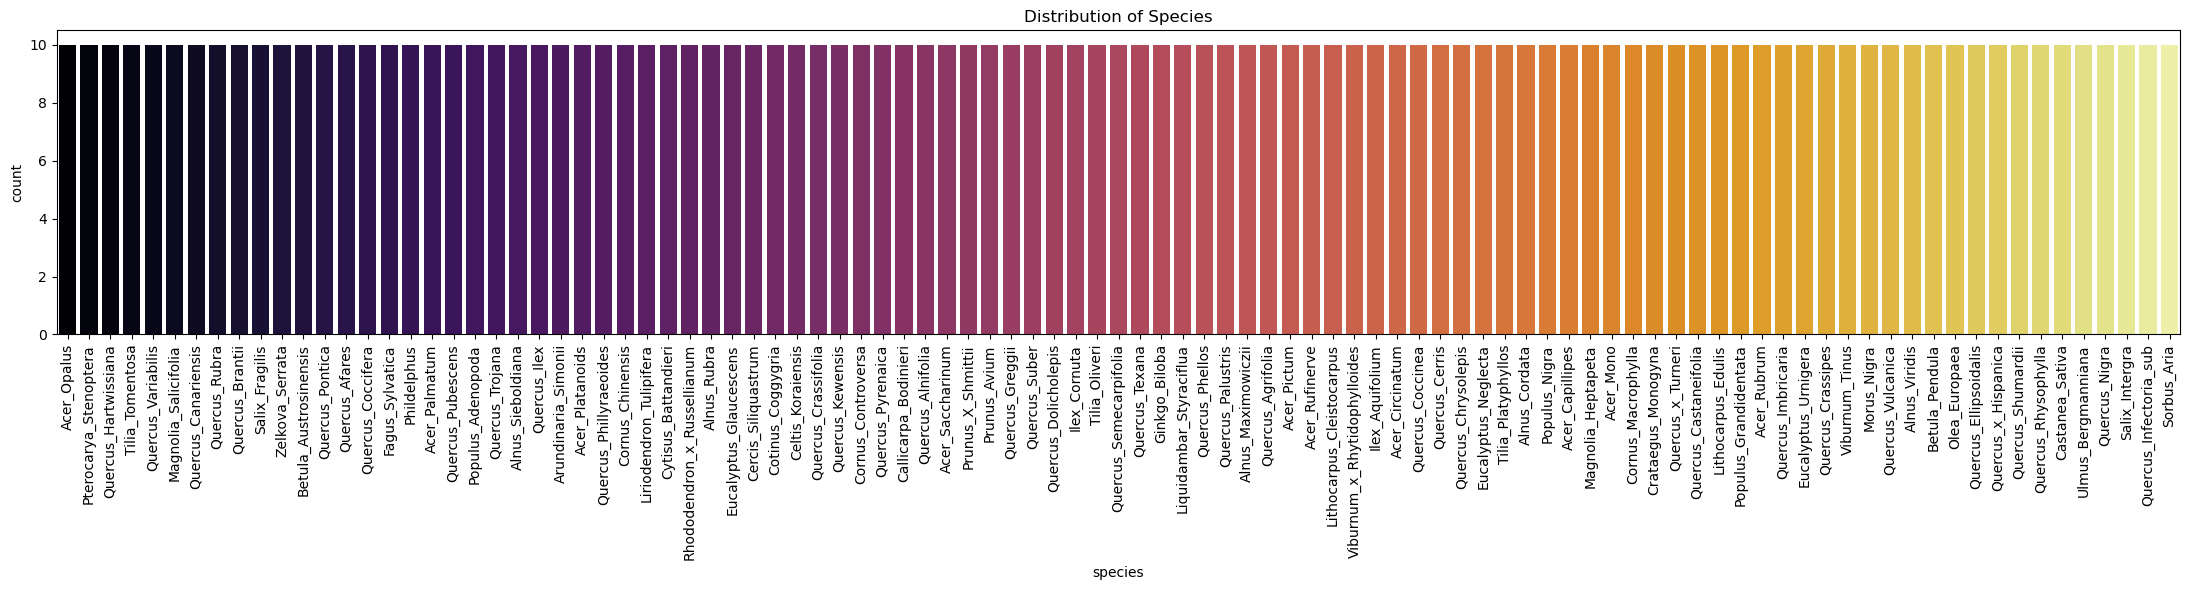

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the distribution of the target variable (class labels)
plt.figure(figsize=(22, 6))
sns.countplot(x='species', data=df, palette='inferno')
plt.title('Distribution of Species')
plt.xticks(rotation=90)
plt.margins(x=0.0009)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()




In [ ]:
df_features = list(df.loc[:, 'margin1':])

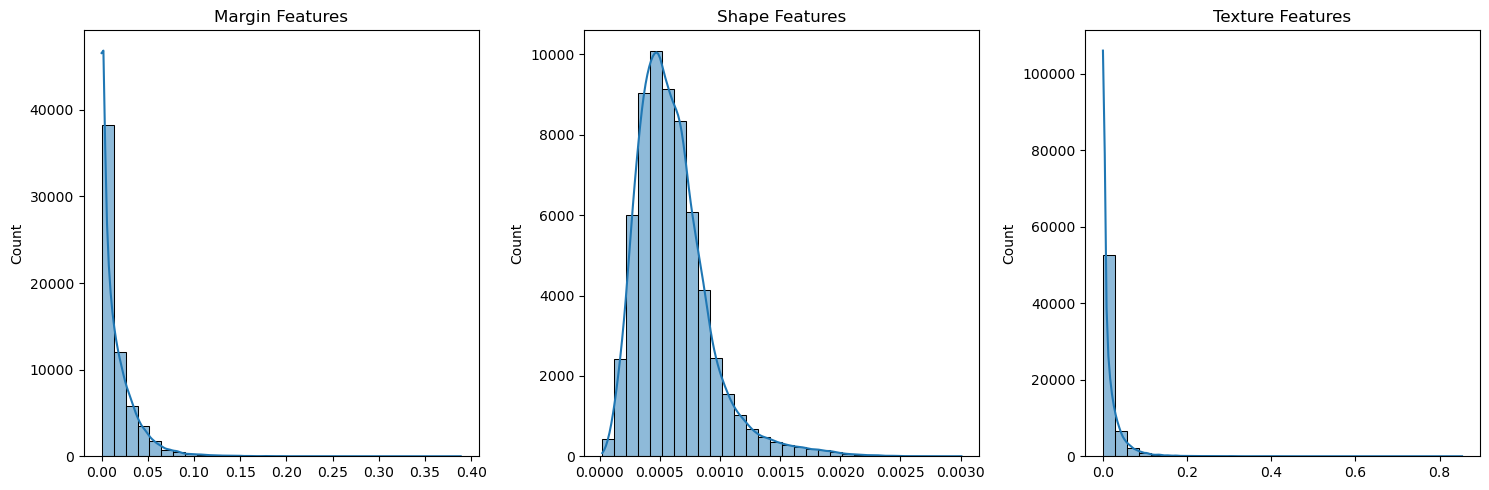

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = ...

# Extract features for each type (margin, shape, texture)
margin_features = df.loc[:, 'margin1':'margin64']
shape_features = df.loc[:, 'shape1':'shape64']
texture_features = df.loc[:, 'texture1':'texture64']

# Visualize using histograms for each feature type
plt.figure(figsize=(15, 5))

# Plot for Margin features
plt.subplot(1, 3, 1)
sns.histplot(data=margin_features.values.flatten(), bins=30, kde=True)
plt.title('Margin Features')

# Plot for Shape features
plt.subplot(1, 3, 2)
sns.histplot(data=shape_features.values.flatten(), bins=30, kde=True)
plt.title('Shape Features')

# Plot for Texture features
plt.subplot(1, 3, 3)
sns.histplot(data=texture_features.values.flatten(), bins=30, kde=True)
plt.title('Texture Features')

plt.tight_layout()
plt.show()

### 1.5 Drawing Images

### 1.6 Correlation Analysis 

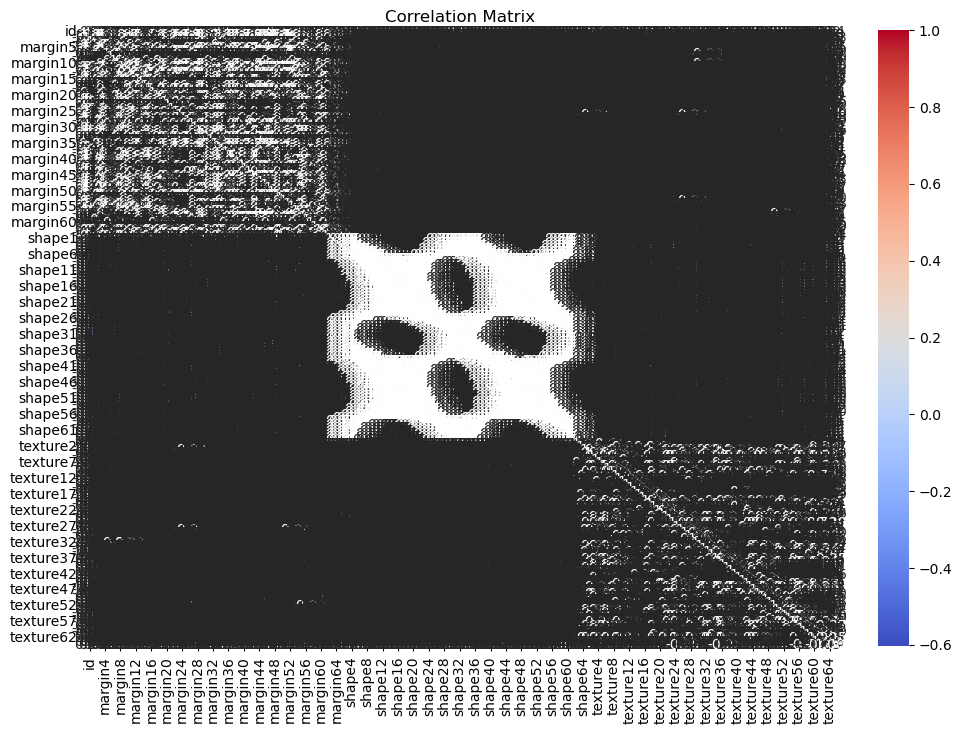

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

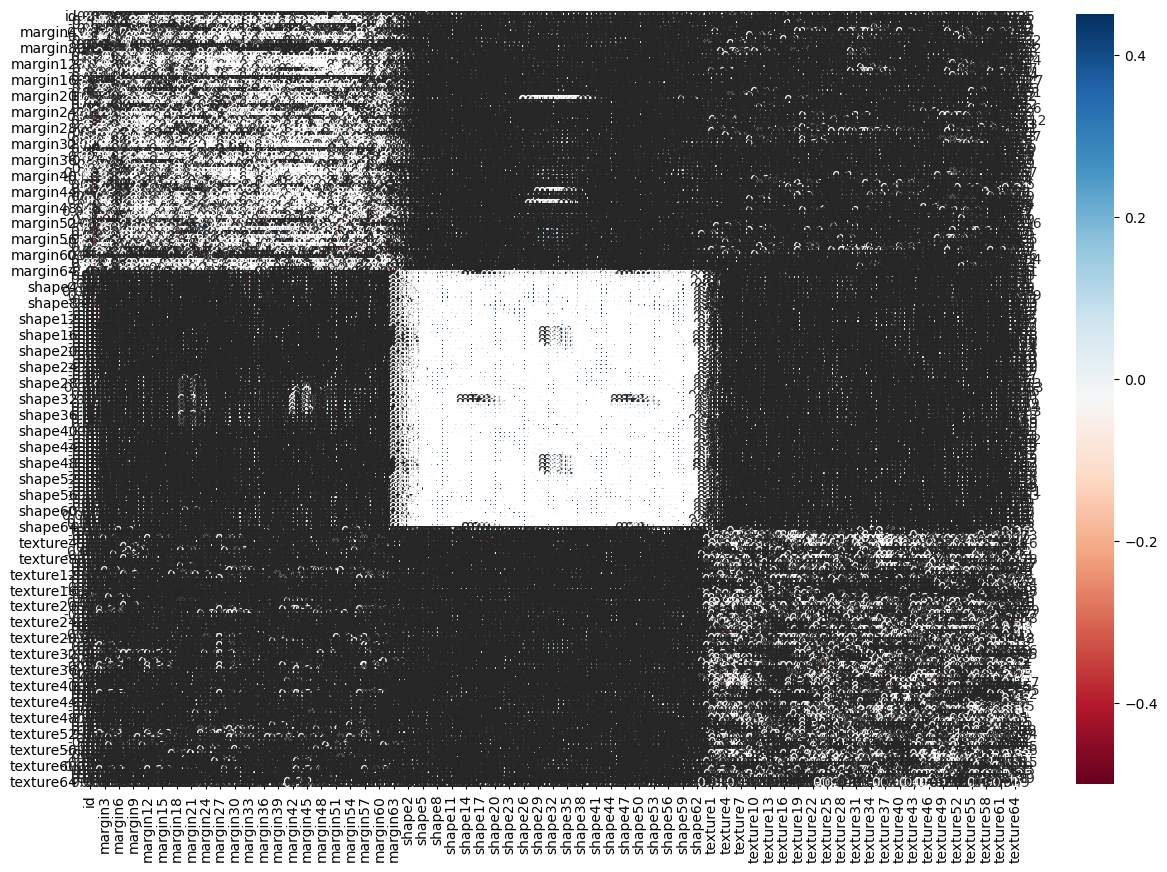

In [ ]:
import numpy as np
corr_matrix = df.corr(method='pearson')
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', linewidths=0.5, vmin = -0.5, vmax = 0.45)

### 1.7 Label Encoding

In [ ]:
label = df.species

new_df = df.drop(['species','id'], axis = 1)

In [ ]:
from sklearn import preprocessing

LabelEncoder  = preprocessing.LabelEncoder()
LabelEncoder.fit(label)
species_label = LabelEncoder.transform(label)

### 1.8 Train/Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_df, species_label ,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape


((792, 192), (198, 192))

### 1.9 Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)